In [ ]:
!pip install astral
!pip install skforecast==0.13.0
!pip install shap
!pip install catboost
!pip install ipython-autotime
!pip install scikit-optimize
!pip install ipython-autotime
!pip install tensorflow keras-tuner

%load_ext autotime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.5/670.5 kB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 57.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 8.9 MB/s eta 0:00:00
time: 289 µs (started: 2025-05-19 11:32:53 +00:00)


In [ ]:
# Data processing
# ==============================================================================

import numpy as np
import pandas as pd
from astral.sun import sun
from astral import LocationInfo
from skforecast.datasets import fetch_dataset
import seaborn as sns
# Plots
# ==============================================================================
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from skforecast.plot import plot_residuals
import plotly.graph_objects as go
import plotly.io as pio
import plotly.offline as poff
# pio.templates.default = "seaborn"
poff.init_notebook_mode(connected=True)
# plt.style.use('seaborn-v0_8-darkgrid')

# Modelling and Forecasting
# ==============================================================================
import xgboost
import lightgbm
import catboost
import sklearn
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import RFECV
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector

import skforecast
from skforecast.ForecasterBaseline import ForecasterEquivalentDate
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregCustom import ForecasterAutoregCustom
from skforecast.ForecasterAutoregDirect import ForecasterAutoregDirect
from skforecast.model_selection import bayesian_search_forecaster
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster
from skforecast.utils import save_forecaster
from skforecast.utils import load_forecaster
from skforecast.model_selection import select_features
import shap
import time

# Warnings configuration
# ==============================================================================
import warnings
warnings.filterwarnings('once')

print(f"Version skforecast: {skforecast.__version__}")
print(f"Version scikit-learn: {sklearn.__version__}")
print(f"Version lightgbm: {lightgbm.__version__}")
print(f"Version xgboost: {xgboost.__version__}")
print(f"Version catboost: {catboost.__version__}")

Version skforecast: 0.13.0
Version scikit-learn: 1.6.1
Version lightgbm: 4.5.0
Version xgboost: 2.1.4
Version catboost: 1.2.8
time: 20.5 s (started: 2025-05-19 11:32:53 +00:00)


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import make_scorer, mean_absolute_error

<frozen importlib._bootstrap>:1047: ImportWarning:

_PyDrive2ImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:1047: ImportWarning:

_PyDriveImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:1047: ImportWarning:

_GenerativeAIImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:1047: ImportWarning:

_OpenCVImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:1047: ImportWarning:

APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:1047: ImportWarning:

_BokehImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:1047: ImportWarning:

_AltairImportHook.find_spec() not found; falling back to find_module()



time: 306 ms (started: 2025-05-19 11:33:14 +00:00)


In [ ]:
from google.colab import files

# Tải tệp lên từ máy tính
uploaded = files.upload()

data = pd.read_excel('WT_data_after_preprocessing.xlsx')

# Hiển thị dữ liệu
print(data.head())

Saving WT_data_after_preprocessing.xlsx to WT_data_after_preprocessing.xlsx
                 Time           P  windspeed  wind direct   air temp  \
0 2022-11-05 14:00:00  274.000000   7.690833    59.300000  24.841667   
1 2022-11-05 18:00:00  259.583333   7.807500    78.308333  22.900000   
2 2022-11-05 22:00:00    0.000000   0.000000    92.500000  23.091667   
3 2022-11-05 23:00:00    0.000000   0.000000    92.500000  22.966667   
4 2022-11-06 00:00:00    0.000000   0.000000    92.500000  23.033333   

    humidity  irrad global horizontal  irrad plant of array     pressure  \
0  72.066667                   380.75                 366.0  1015.000000   
1  79.883333                     0.00                   0.0  1016.000000   
2  80.200000                     0.00                   0.0  1017.500000   
3  81.383333                     0.00                   0.0  1017.000000   
4  81.883333                     0.00                   0.0  1016.333333   

   rain fall  ...  wind direction 

<frozen importlib._bootstrap>:1047: ImportWarning:

_PyDrive2ImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:1047: ImportWarning:

_PyDriveImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:1047: ImportWarning:

_GenerativeAIImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:1047: ImportWarning:

_OpenCVImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:1047: ImportWarning:

APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:1047: ImportWarning:

_BokehImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:1047: ImportWarning:

_AltairImportHook.find_spec() not found; falling back to find_module()



In [ ]:
# Cliclical encoding of calendar and sunlight features
# ==============================================================================
def cyclical_encoding(data: pd.Series, cycle_length: int) -> pd.DataFrame:
    """
    Encode a cyclical feature with two new features sine and cosine.
    The minimum value of the feature is assumed to be 0. The maximum value
    of the feature is passed as an argument.

    Parameters
    ----------
    data : pd.Series
        Series with the feature to encode.
    cycle_length : int
        The length of the cycle. For example, 12 for months, 24 for hours, etc.
        This value is used to calculate the angle of the sin and cos.

    Returns
    -------
    result : pd.DataFrame
        Dataframe with the two new features sin and cos.

    """

    sin = np.sin(2 * np.pi * data/cycle_length)
    cos = np.cos(2 * np.pi * data/cycle_length)
    result =  pd.DataFrame({
                  f"{data.name}_sin": sin,
                  f"{data.name}_cos": cos
              })

    return result


month_encoded = cyclical_encoding(data['month'], cycle_length=12)
week_day_encoded = cyclical_encoding(data['weekday'], cycle_length=7)
hour_day_encoded = cyclical_encoding(data['hour'], cycle_length=24)



cyclical_features = pd.concat([
                        month_encoded,
                        week_day_encoded,
                        hour_day_encoded
                    ], axis=1)

data = pd.concat([data, cyclical_features], axis=1)
data.describe(include = 'all')

<frozen importlib._bootstrap>:1047: ImportWarning:

_PyDrive2ImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:1047: ImportWarning:

_PyDriveImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:1047: ImportWarning:

_GenerativeAIImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:1047: ImportWarning:

_OpenCVImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:1047: ImportWarning:

APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:1047: ImportWarning:

_BokehImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:1047: ImportWarning:

_AltairImportHook.find_spec() not found; falling back to find_module()



,Time,P,windspeed,wind direct,air temp,humidity,irrad global horizontal,irrad plant of array,pressure,rain fall,...,week,weekday,day_str,year_month,month_sin,month_cos,weekday_sin,weekday_cos,hour_sin,hour_cos
count,3508,3508.000000,3508.000000,3508.000000,3508.000000,3508.000000,3508.000000,3508.000000,3508.000000,3508.000000,...,3508.000000,3508.000000,3508,3508,3508.000000,3.508000e+03,3.508000e+03,3508.000000,3508.000000,3.508000e+03
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,7,15,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Sun,2023_11,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,569,374,NaN,NaN,NaN,NaN,NaN,NaN
mean,2023-06-20 12:17:18.540478976,173.985080,6.419668,129.987486,25.834587,82.596522,129.678592,118.616554,1009.066534,0.000066,...,30.663911,4.061288,NaN,NaN,-0.123526,7.852763e-02,-4.206812e-03,0.033185,-0.101204,6.944543e-02
min,2022-11-05 14:00:00,0.000000,0.000000,10.102500,13.666667,48.558333,0.000000,0.000000,993.000000,0.000000,...,1.000000,1.000000,NaN,NaN,-1.000000,-1.000000e+00,-9.749279e-01,-0.900969,-1.000000,-1.000000e+00
25%,2023-03-08 20:45:00,77.332708,5.146875,75.731250,22.583333,78.993750,0.000000,0.000000,1003.000000,0.000000,...,19.000000,2.000000,NaN,NaN,-0.500000,-5.000000e-01,-7.818315e-01,-0.900969,-0.866025,-5.000000e-01
50%,2023-06-30 01:30:00,152.625000,6.296250,103.745833,26.500000,84.054167,0.216667,0.191667,1009.416667,0.000000,...,32.000000,4.000000,NaN,NaN,-0.500000,6.123234e-17,-2.449294e-16,-0.222521,-0.258819,6.123234e-17
75%,2023-09-24 18:15:00,263.479167,7.571042,194.250000,29.408333,88.000000,163.854167,152.037500,1014.416667,0.000000,...,45.000000,6.000000,NaN,NaN,0.500000,8.660254e-01,7.818315e-01,0.623490,0.707107,7.071068e-01
max,2024-01-01 23:00:00,473.916667,17.550000,353.916667,35.233333,94.000000,981.833333,966.333333,1027.583333,0.033333,...,52.000000,7.000000,NaN,NaN,1.000000,1.000000e+00,9.749279e-01,1.000000,1.000000,1.000000e+00


time: 76.8 ms (started: 2025-05-19 11:33:48 +00:00)


In [ ]:
exog_features = data.columns
elements_to_remove = ['day_str',	'year_month',	'distance' , 'P','year','distance_to_smooth_curve', 'P_wind_bin', 'windspeed_bin','P','year','distance_to_smooth_curve', 'P_wind_bin', 'windspeed_bin','Q','S','Time',
 'month',
 'week',
 'hour',
 'weekday',
 'day']
exog_features = [item for item in exog_features if item not in elements_to_remove]

time: 941 µs (started: 2025-05-19 11:33:51 +00:00)


In [ ]:
exog_features

['windspeed',
 'wind direct',
 'air temp',
 'humidity',
 'irrad global horizontal',
 'irrad plant of array',
 'pressure',
 'rain fall',
 'temp 1',
 'temp 2',
 'temp 3',
 'wind direction',
 'wind speed',
 'month_sin',
 'month_cos',
 'weekday_sin',
 'weekday_cos',
 'hour_sin',
 'hour_cos']

time: 2.48 ms (started: 2025-05-19 11:33:53 +00:00)


*************************************************************************
**********************************P********************************
*************************************************************************


<frozen importlib._bootstrap>:1047: ImportWarning:

_PyDrive2ImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:1047: ImportWarning:

_PyDriveImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:1047: ImportWarning:

_GenerativeAIImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:1047: ImportWarning:

_OpenCVImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:1047: ImportWarning:

APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:1047: ImportWarning:

_BokehImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:1047: ImportWarning:

_AltairImportHook.find_spec() not found; falling back to find_module()



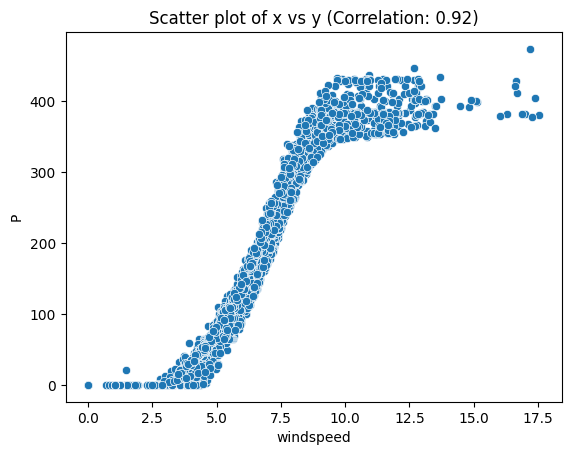

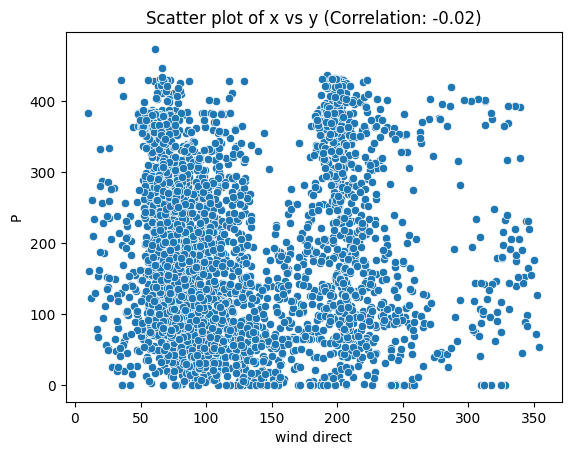

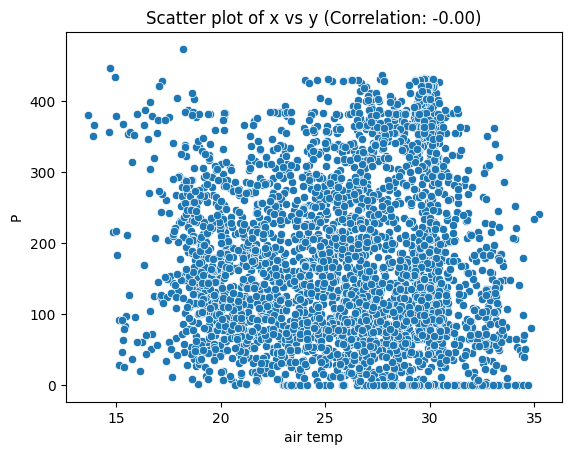

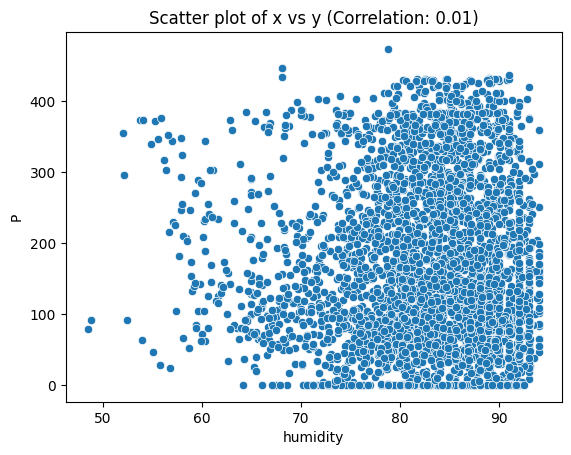

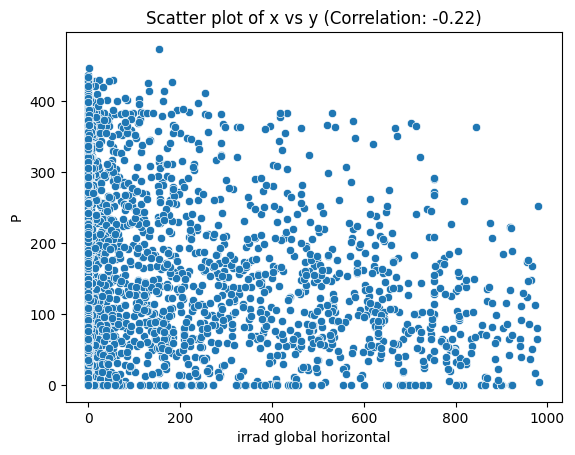

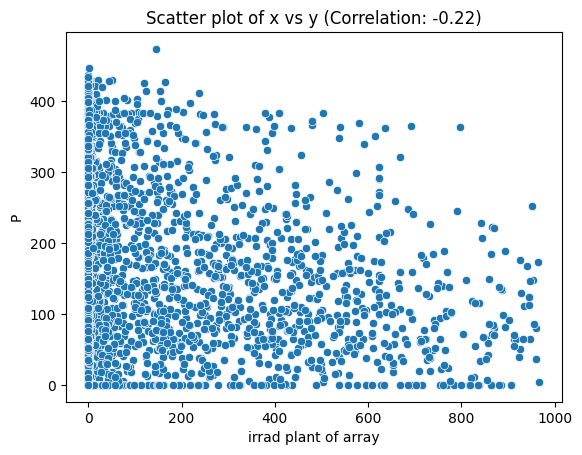

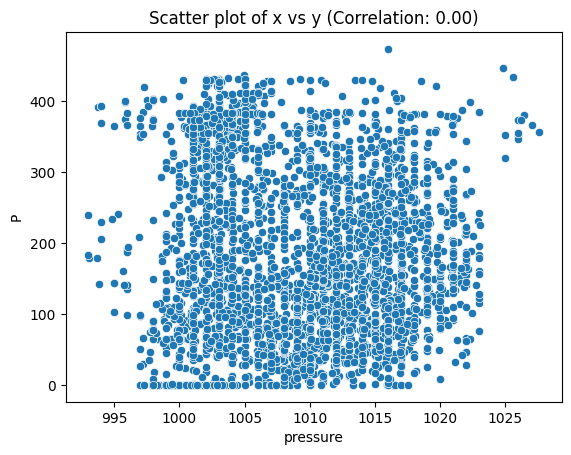

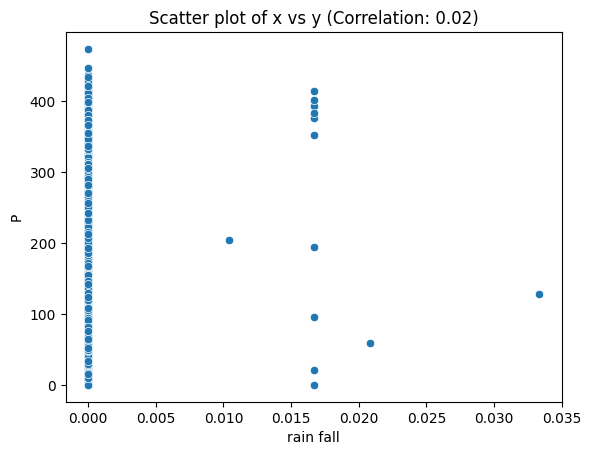

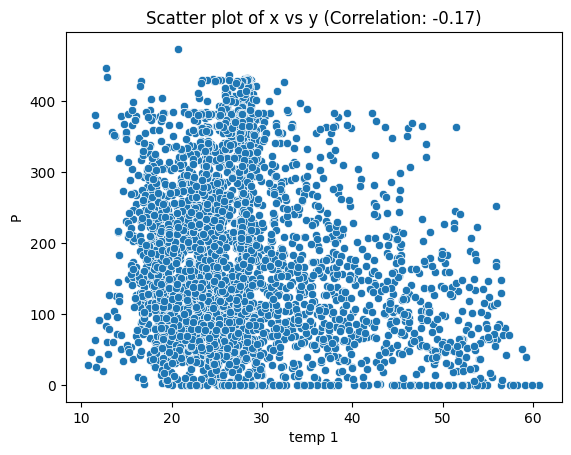

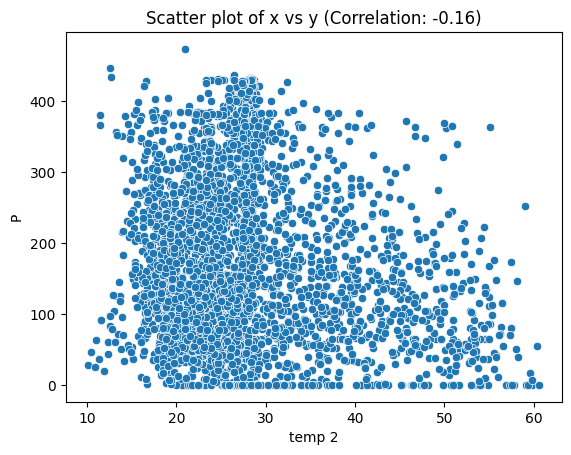

/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning:

invalid value encountered in divide



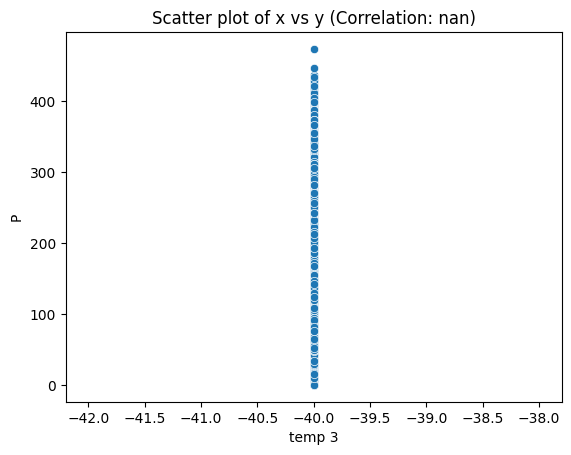

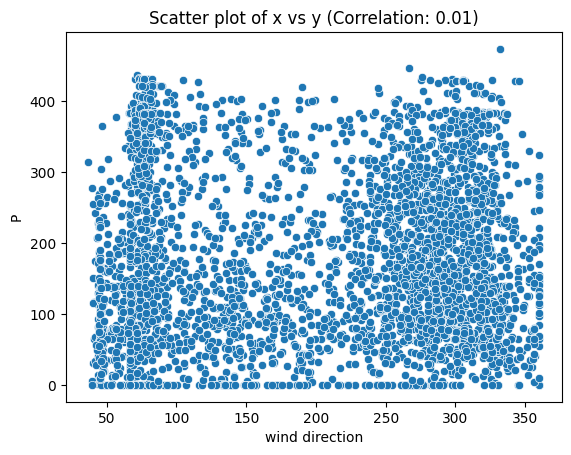

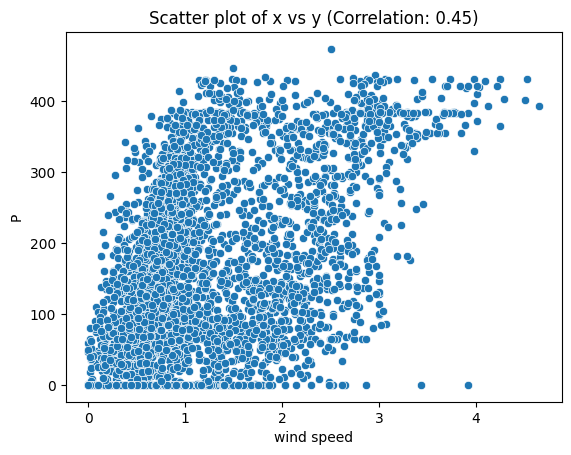

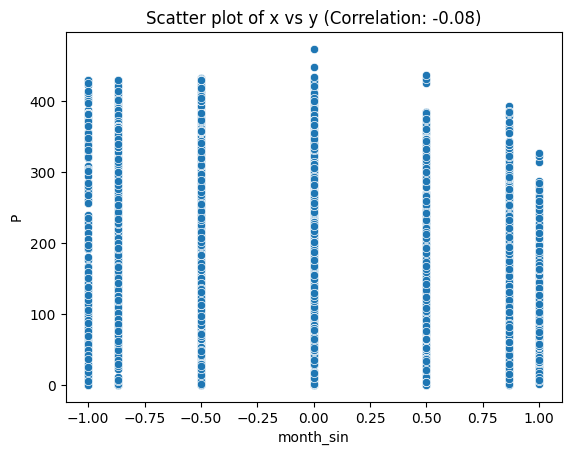

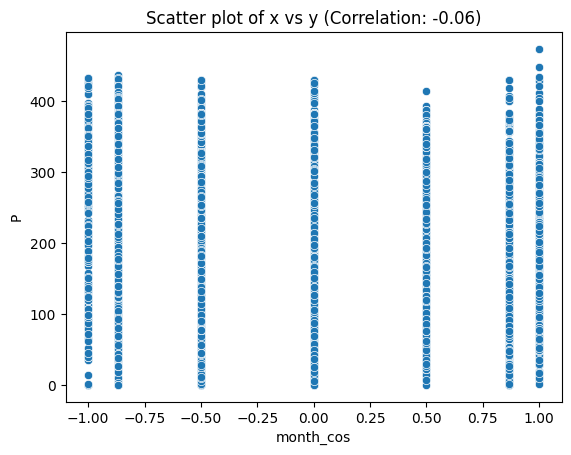

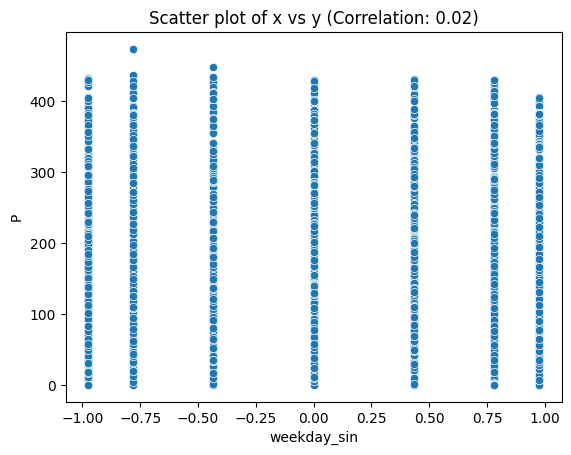

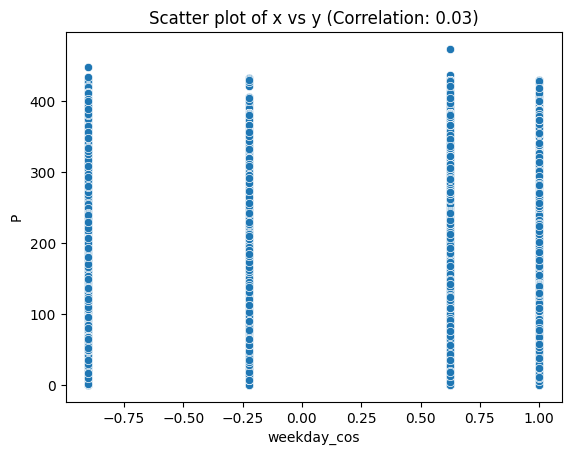

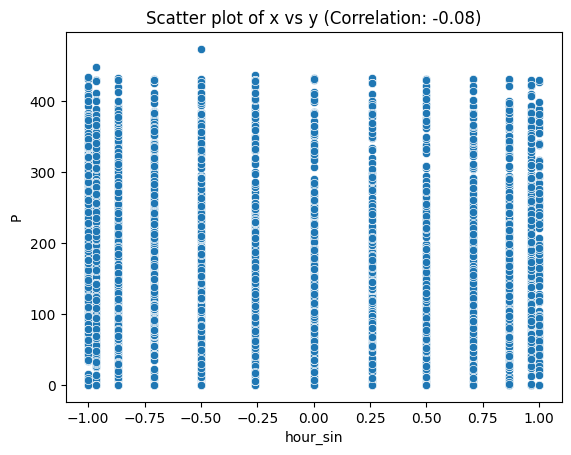

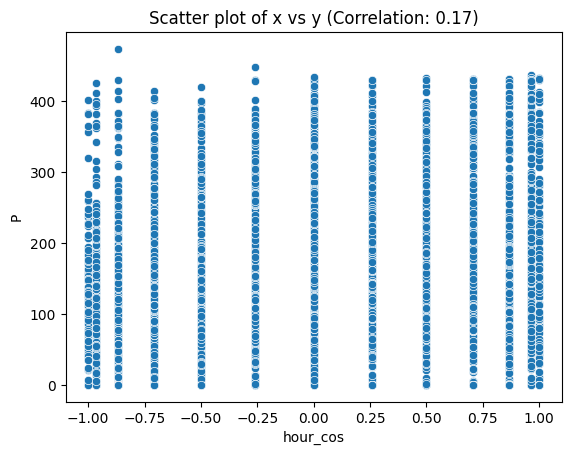

['windspeed', 'wind speed']
time: 4.61 s (started: 2025-05-19 11:33:55 +00:00)


In [ ]:
target = 'P'
fe =[]
print("*************************************************************************")
print("**********************************"+target+"********************************")
print("*************************************************************************")
for i in exog_features:
    correlation = data[target].corr(data[i])
    # Vẽ biểu đồ
    sns.scatterplot(data=data, y=target, x=i)
    # Đặt tiêu đề với hệ số tương quan
    plt.title(f'Scatter plot of x vs y (Correlation: {correlation:.2f})')
    if abs(correlation)> 0.25: fe.append(i)
    plt.show()
print(fe)

# All

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
# Original split with ID tracking
X = data[exog_features]  # Exclude ID here for training and prediction
y = data["P"]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=2529)

# Resetting index to avoid misalignment after splitting
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

time: 6.68 ms (started: 2025-05-19 11:34:09 +00:00)


In [ ]:
start_time = time.time()
search_spaces  = {
        'n_estimators'  : Integer( 100, 1000),
        'max_depth'     : Integer( 3, 15),
        'learning_rate' : Real( 0.01, 1),
    }
initial_model = CatBoostRegressor(
                    random_state=123,
                    silent=True,
                    allow_writing_files=False,
                    boosting_type = 'Plain', # Faster training
                    leaf_estimation_iterations = 3, # Faster training
                )
initial_model.fit(X_train, y_train)
# Regressor hyperparameters search space
n_splits = 5  # Number of splits for cross-validation
cv_strategy = KFold(n_splits=5, shuffle=True, random_state=42)
opt = BayesSearchCV(
    estimator=initial_model,
    search_spaces=search_spaces,
    n_iter=50,
    scoring=make_scorer(mean_absolute_error, greater_is_better=False),
    random_state=42,
    cv=cv_strategy # This is a custom cv strategy that only uses test data
)
# Tiến hành tối ưu hóa
opt.fit(X_train, y_train)

# Kết quả
print("Best parameters found: ", opt.best_params_)
print("Best cross-validation score: ", opt.best_score_)
end_time = time.time()
turning_time = end_time - start_time
print(turning_time)

Best parameters found:  OrderedDict([('learning_rate', 0.03327193553428455), ('max_depth', 9), ('n_estimators', 1000)])
Best cross-validation score:  -10.57694822571342
18382.779711008072
time: 5h 6min 22s (started: 2025-05-19 11:34:38 +00:00)


In [ ]:
best_model = CatBoostRegressor(**opt.best_params_)
best_model.fit(X_train, y_train)
start_time = time.time()
# Predict on the test set
y_test_pred = best_model.predict(X_test)
end_time = time.time()
test_time = end_time - start_time
print(test_time)
# Evaluate using Mean Absolute Error (or another metric)
test_score = mean_absolute_error(y_test, y_test_pred)
print("Validation set mean absolute error:", test_score)

print(np.mean(y_test))
print(np.mean(y_test_pred))

0:	learn: 116.0992932	total: 19.1ms	remaining: 19.1s
1:	learn: 112.7511999	total: 38.7ms	remaining: 19.3s
2:	learn: 109.5720639	total: 57.3ms	remaining: 19s
3:	learn: 106.3423189	total: 85.5ms	remaining: 21.3s
4:	learn: 103.3147268	total: 120ms	remaining: 24s
5:	learn: 100.3420728	total: 155ms	remaining: 25.7s
6:	learn: 97.5805429	total: 160ms	remaining: 22.7s
7:	learn: 94.8637012	total: 194ms	remaining: 24.1s
8:	learn: 92.3727352	total: 229ms	remaining: 25.2s
9:	learn: 89.6771450	total: 261ms	remaining: 25.9s
10:	learn: 87.2748768	total: 289ms	remaining: 26s
11:	learn: 84.7882378	total: 326ms	remaining: 26.8s
12:	learn: 82.3579885	total: 361ms	remaining: 27.4s
13:	learn: 80.0619244	total: 388ms	remaining: 27.4s
14:	learn: 77.9859455	total: 424ms	remaining: 27.8s
15:	learn: 75.8495986	total: 462ms	remaining: 28.4s
16:	learn: 73.6357031	total: 497ms	remaining: 28.8s
17:	learn: 71.6373321	total: 539ms	remaining: 29.4s
18:	learn: 69.7163019	total: 582ms	remaining: 30s
19:	learn: 67.890706

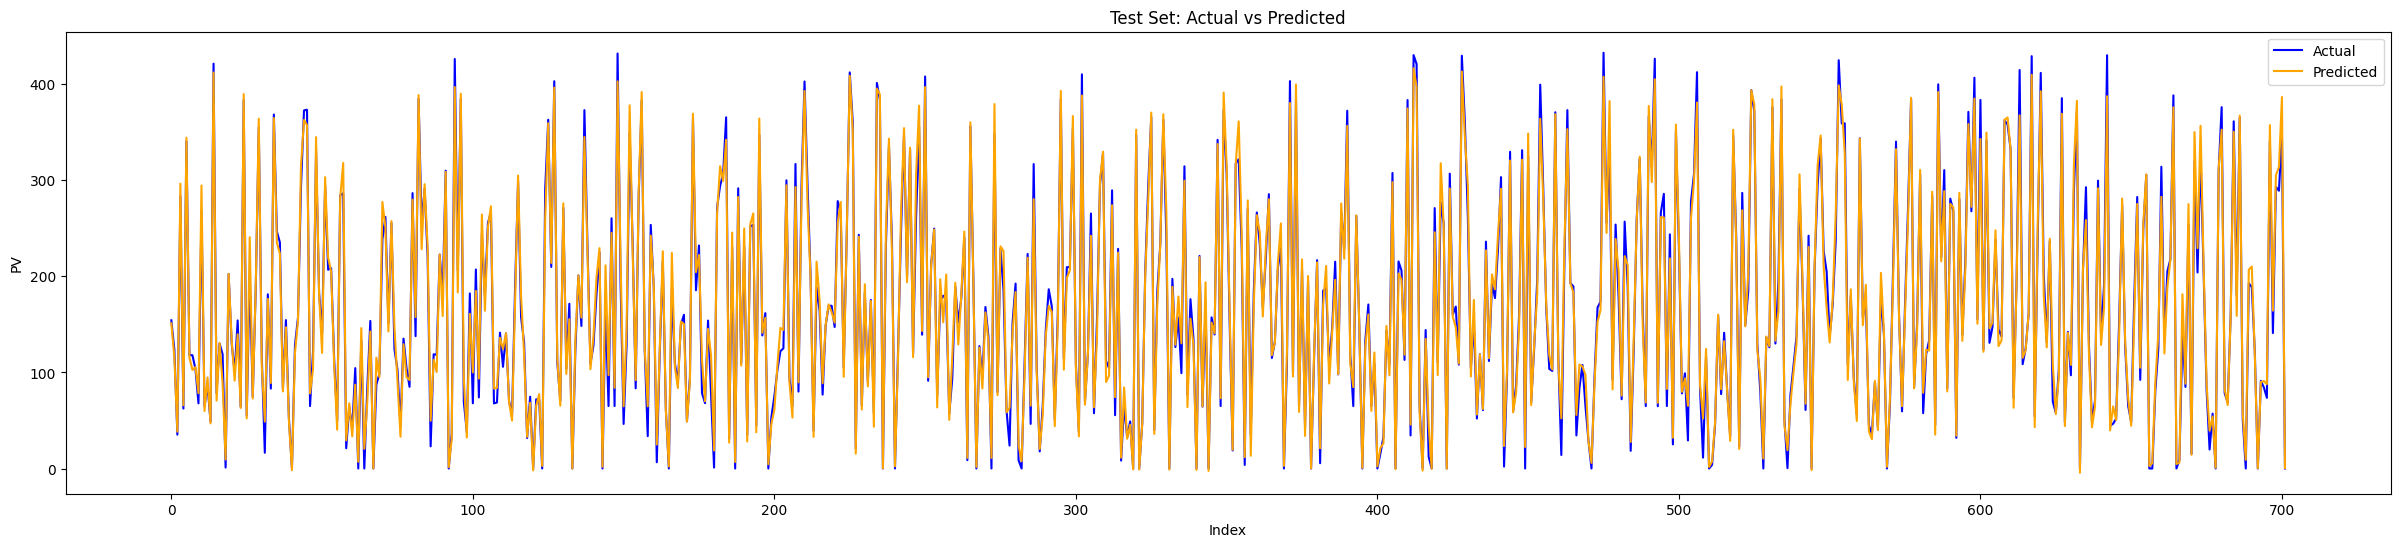

time: 391 ms (started: 2025-05-19 16:45:34 +00:00)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.graph_objects as go

# Assuming y_val and y_val_pred have the same index for easy plotting
y_test_series = pd.Series(y_test, index=y_test.index)  # Ensure y_val is a Series with the correct index

# Plot the actual vs predicted values
plt.figure(figsize=(30, 6))
plt.plot(y_test_series.index, y_test_series, label='Actual', color='b')
plt.plot(y_test_series.index, y_test_pred, label='Predicted', color='orange')
plt.xlabel('Index')
plt.ylabel('PV')
plt.title('Test Set: Actual vs Predicted')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
# Test error
# ==============================================================================
y_true = y_test
y_pred = y_test_pred
#y_pred = y_pred.values.reshape(-1)

# Tính MSE và MAE
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)

# Tính MAPE
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100 #lỗi do y_true có gtri = 0

# Tính Relative MAE (rel_mae)
mean_actual = np.mean(y_true)
rel_mae = 100 * (mae / mean_actual)
rel_rmse = 100 * (rmse / mean_actual)


# Hiển thị các kết quả
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MAPE: {mape}%')
print(f'Relative MAE: {rel_mae}%')
print(f'Relative RMSE: {rel_rmse}%')

MSE: 211.6887848766195
RMSE: 14.549528682284507
MAE: 10.855388859001637
MAPE: inf%
Relative MAE: 6.40559095008318%
Relative RMSE: 8.585443641471604%
time: 5.47 ms (started: 2025-05-19 16:45:38 +00:00)


In [ ]:
import pickle
from google.colab import drive
drive.mount('/content/drive')
model_path = '/content/drive/MyDrive/19_5/CatBoost_wind_all_model.pkl'
with open(model_path, 'wb') as f:
    pickle.dump(best_model, f)

Mounted at /content/drive
time: 16.7 s (started: 2025-05-19 16:45:44 +00:00)


In [ ]:
import pickle
from google.colab import drive
drive.mount('/content/drive')
train_time = turning_time

save_data = {'MSE': mse, 'MAE' : mae,'RMSE' : rmse, 'Relative MAE' : rel_mae, 'Relative RMSE' : rel_rmse, 'train time' : train_time, 'test time' :test_time}

with open('/content/drive/MyDrive/19_5/wind_CatBoosting_all.pkl', 'wb') as f:
  pickle.dump(save_data, f)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
time: 3.04 s (started: 2025-05-19 16:46:01 +00:00)


# Selected

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
# Original split with ID tracking
X = data[fe]  # Exclude ID here for training and prediction
y = data["P"]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=2529)

# Resetting index to avoid misalignment after splitting
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

time: 6.72 ms (started: 2025-05-19 16:46:06 +00:00)


In [ ]:
start_time = time.time()
search_spaces  = {
        'n_estimators'  : Integer( 100, 1000),
        'max_depth'     : Integer( 3, 15),
        'learning_rate' : Real( 0.01, 1),
    }
initial_model = CatBoostRegressor(
                    random_state=123,
                    silent=True,
                    allow_writing_files=False,
                    boosting_type = 'Plain', # Faster training
                    leaf_estimation_iterations = 3, # Faster training
                )
initial_model.fit(X_train, y_train)
# Regressor hyperparameters search space
n_splits = 5  # Number of splits for cross-validation
cv_strategy = KFold(n_splits=5, shuffle=True, random_state=42)
opt = BayesSearchCV(
    estimator=initial_model,
    search_spaces=search_spaces,
    n_iter=50,
    scoring=make_scorer(mean_absolute_error, greater_is_better=False),
    random_state=42,
    cv=cv_strategy # This is a custom cv strategy that only uses test data
)
# Tiến hành tối ưu hóa
opt.fit(X_train, y_train)

# Kết quả
print("Best parameters found: ", opt.best_params_)
print("Best cross-validation score: ", opt.best_score_)
end_time = time.time()
turning_time = end_time - start_time
print(turning_time)

Best parameters found:  OrderedDict([('learning_rate', 0.01), ('max_depth', 6), ('n_estimators', 950)])
Best cross-validation score:  -12.430475811544994
5052.211672306061
time: 1h 24min 12s (started: 2025-05-19 16:46:10 +00:00)


In [ ]:
best_model = CatBoostRegressor(**opt.best_params_)
best_model.fit(X_train, y_train)
start_time = time.time()
# Predict on the test set
y_test_pred = best_model.predict(X_test)
end_time = time.time()
test_time = end_time - start_time
print(test_time)
# Evaluate using Mean Absolute Error (or another metric)
test_score = mean_absolute_error(y_test, y_test_pred)
print("Validation set mean absolute error:", test_score)

print(np.mean(y_test))
print(np.mean(y_test_pred))

0:	learn: 118.4311022	total: 1.25ms	remaining: 1.19s
1:	learn: 117.3264275	total: 2.38ms	remaining: 1.13s
2:	learn: 116.2188847	total: 3.39ms	remaining: 1.07s
3:	learn: 115.1375557	total: 4.35ms	remaining: 1.03s
4:	learn: 114.0883374	total: 5.31ms	remaining: 1s
5:	learn: 113.0614757	total: 6.28ms	remaining: 988ms
6:	learn: 112.0098901	total: 7.21ms	remaining: 972ms
7:	learn: 110.9759983	total: 8.16ms	remaining: 961ms
8:	learn: 109.9530557	total: 9.11ms	remaining: 952ms
9:	learn: 108.9344000	total: 10ms	remaining: 945ms
10:	learn: 107.9182772	total: 11ms	remaining: 939ms
11:	learn: 106.9536417	total: 11.9ms	remaining: 933ms
12:	learn: 105.9730129	total: 12.9ms	remaining: 928ms
13:	learn: 105.0209568	total: 13.8ms	remaining: 925ms
14:	learn: 104.0878398	total: 14.8ms	remaining: 921ms
15:	learn: 103.1338661	total: 15.7ms	remaining: 917ms
16:	learn: 102.2047750	total: 16.7ms	remaining: 917ms
17:	learn: 101.2654219	total: 17.8ms	remaining: 924ms
18:	learn: 100.3252946	total: 18.8ms	remainin

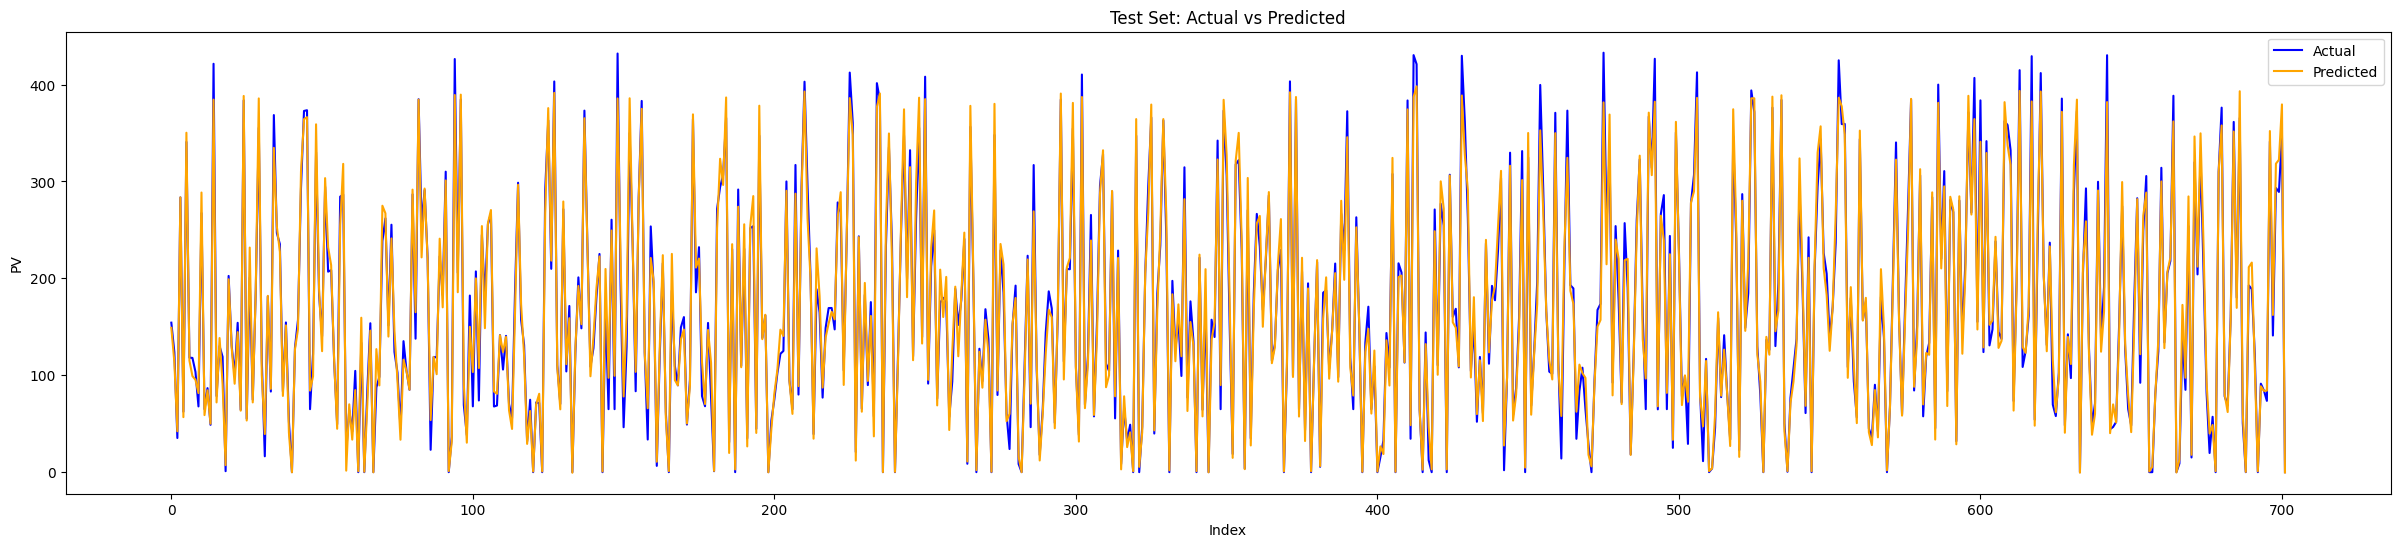

time: 395 ms (started: 2025-05-19 18:10:23 +00:00)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.graph_objects as go

# Assuming y_val and y_val_pred have the same index for easy plotting
y_test_series = pd.Series(y_test, index=y_test.index)  # Ensure y_val is a Series with the correct index

# Plot the actual vs predicted values
plt.figure(figsize=(30, 6))
plt.plot(y_test_series.index, y_test_series, label='Actual', color='b')
plt.plot(y_test_series.index, y_test_pred, label='Predicted', color='orange')
plt.xlabel('Index')
plt.ylabel('PV')
plt.title('Test Set: Actual vs Predicted')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
# Test error
# ==============================================================================
y_true = y_test
y_pred = y_test_pred
#y_pred = y_pred.values.reshape(-1)

# Tính MSE và MAE
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)

# Tính MAPE
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100 #lỗi do y_true có gtri = 0

# Tính Relative MAE (rel_mae)
mean_actual = np.mean(y_true)
rel_mae = 100 * (mae / mean_actual)
rel_rmse = 100 * (rmse / mean_actual)


# Hiển thị các kết quả
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MAPE: {mape}%')
print(f'Relative MAE: {rel_mae}%')
print(f'Relative RMSE: {rel_rmse}%')

MSE: 298.79052978560946
RMSE: 17.28555841694475
MAE: 13.040446054493733
MAPE: inf%
Relative MAE: 7.694958173925364%
Relative RMSE: 10.199930928397775%
time: 5.26 ms (started: 2025-05-19 18:10:24 +00:00)


In [ ]:
import pickle
from google.colab import drive
drive.mount('/content/drive')
model_path = '/content/drive/MyDrive/19_5/CatBoost_wind_selected_model.pkl'
with open(model_path, 'wb') as f:
    pickle.dump(best_model, f)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
time: 2.75 s (started: 2025-05-19 18:10:24 +00:00)


In [ ]:
import pickle
from google.colab import drive
drive.mount('/content/drive')
train_time = turning_time

save_data = {'MSE': mse, 'MAE' : mae,'RMSE' : rmse, 'Relative MAE' : rel_mae, 'Relative RMSE' : rel_rmse, 'train time' : train_time, 'test time' :test_time}

with open('/content/drive/MyDrive/19_5/wind_CatBoosting_selected.pkl', 'wb') as f:
  pickle.dump(save_data, f)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
time: 3.09 s (started: 2025-05-19 18:10:27 +00:00)
